## This notebook contains plots with some of the results found in our MCP article

### Contents:

#### I) Plot of the MCP flux at the surface

#### II) Plot of the event rate for an underground detector as a function of $\cos\theta$

#### III) Plot of the event distribution at JUNO

#### IV) Plot with constraints from single-scattering searches

#### V) Plot with constraints from multiple-scattering searches

#### VI) Plot with XENON1T preferred parameter space

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import pandas as pd
import numpy as np
from scipy import interpolate

import os
cwd = os.getcwd()
path_to_style=cwd+'\Figures'
plt.style.use(path_to_style+r"\paper.mplstyle")

### I)  MCP Flux Spectrum

In [2]:
#--- Load the data
path=cwd+'\Data\MCP_flux'
df_pi0=pd.read_csv(path+r'\MCP_FROM_PI0_SURFACE.csv' )
df_eta=pd.read_csv(path+r'\MCP_FROM_ETA_SURFACE.csv' )
df_omega=pd.read_csv(path+r'\MCP_FROM_OMEGA_SURFACE.csv' )
df_rho=pd.read_csv(path+r'\MCP_FROM_RHO_SURFACE.csv'  )
df_phi=pd.read_csv(path+r'\MCP_FROM_PHI_SURFACE.csv' )
df_jpsi=pd.read_csv(path+r'\MCP_FROM_JPSI_SURFACE.csv'  )

#--- Set values to filter the data frame
m_tst=0.01
cos_tst=1.
eps2_tst=1e-1

#--- Define a function to filter the df
def Filter_Meson(df,m,cos,eps2):
    df_TMP=df[df['cosTh'] == cos]
    df_TMP2=df_TMP[df_TMP['eps2'] == eps2]
    df_fil=df_TMP2[df_TMP2['m(GeV)'] == m]
    Energy_val=np.array(df_fil['Energy (GeV)'])
    Flux_val=np.array(df_fil['dphi_dEdCth(1/GeV/s/cm2)']*(2*np.pi*eps2_tst)**-1)
    return Energy_val,Flux_val

#--- Retrieve flux values for each meson
Energy_pi0,flux_pi0=Filter_Meson(df_pi0,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_pi0,m_tst,cos_tst,eps2_tst)[1]
Energy_eta,flux_eta=Filter_Meson(df_eta,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_eta,m_tst,cos_tst,eps2_tst)[1]
Energy_omega,flux_omega=Filter_Meson(df_omega,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_omega,m_tst,cos_tst,eps2_tst)[1]
Energy_rho,flux_rho=Filter_Meson(df_rho,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_rho,m_tst,cos_tst,eps2_tst)[1]
Energy_phi,flux_phi=Filter_Meson(df_phi,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_phi,m_tst,cos_tst,eps2_tst)[1]
Energy_jpsi,flux_jpsi=Filter_Meson(df_jpsi,m_tst,cos_tst,eps2_tst)[0],Filter_Meson(df_jpsi,m_tst,cos_tst,eps2_tst)[1]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


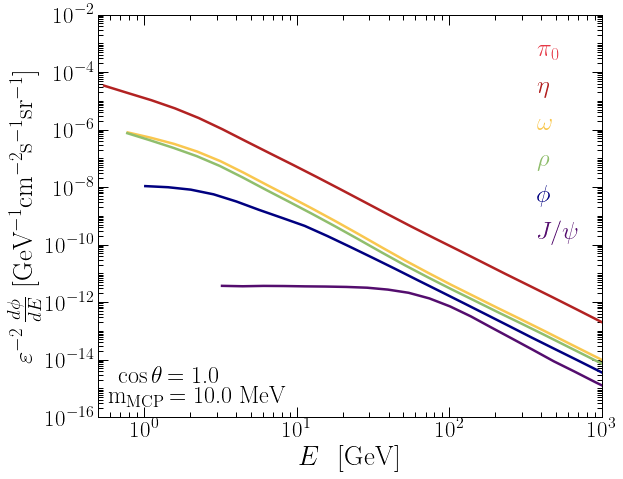

In [3]:
color_list2=['#e63946','firebrick','#f9c74f','#90be6d','navy','#540d6e']

fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(9,7))

lw=2.5
ax.plot(Energy_pi0,flux_pi0, linewidth=lw,color=color_list2[0], label=r'$\pi_{0}$')
ax.plot(Energy_eta,flux_eta, linewidth=lw,color=color_list2[1], label=r'$\eta$')
ax.plot(Energy_omega,flux_omega, linewidth=lw,color=color_list2[2],label=r'$\omega$')
ax.plot(Energy_rho,flux_rho, linewidth=lw,color=color_list2[3],label=r'$\rho$')
ax.plot(Energy_phi,flux_phi,linewidth=lw,color=color_list2[4], label=r'$\phi$')
ax.plot(Energy_jpsi,flux_jpsi, linewidth=lw,color=color_list2[5],label=r'$J \slash \psi$')

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'$ \varepsilon^{-2}\,\frac{d\phi}{dE}\,\,[\textrm{GeV}^{-1} \textrm{cm}^{-2}\textrm{s}^{-1}\textrm{sr}^{-1}]$', fontdict={'size': 27})
ax.set_xlabel(r'$ E \,\,\,\,$' '[GeV]', fontdict={'size': 27})
leg=ax.legend(loc='best', fontsize=25, handlelength=0, handletextpad=0,fancybox=True)
leg.get_frame().set_edgecolor('white')
for it, text in enumerate(leg.get_texts()):# color for legend
    text.set_color(color_list2[it])                 

ax.minorticks_on()
ax.tick_params(labelsize=23,which='both',direction='in',axis='both',right=True, top=True, left=True,bottom=True,width=1.)
ax.tick_params(which='major',length=10.)
ax.tick_params(which='minor',length=5.)

from matplotlib.ticker import MultipleLocator, LogLocator, AutoMinorLocator
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(-2, 10) * 1,
                                      numticks=60)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_xlim([0.5,1e3])
ax.set_ylim([1e-16,1e-2])

ax.text(0.04, 0.1, r'$ \cos\theta\,$' +'= 1.0 ', color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=24)
ax.text(0.02, 0.05, r'$ \textrm{m}_{\textrm{MCP}}\,$' +'= 10.0 MeV',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=24)

plt.tight_layout()
plt.savefig(path_to_style+r'\MCP_surface.pdf', format='pdf')
plt.show()

### II)  Event Rate v/s  $\cos\theta$

In [4]:
from Scripts.Rate_for_cosine import *

Rate_for_cosine.py called! 
mass fixed at 0.01 MeV


In [5]:
#--- Set epsilon^2 values
eps2_val=[1.0e-6,1.0e-4,1.0e-2]
#--- Set minimum recoil energies
Er01,Er1,Er100=0.1,1.0,100.

In [6]:
rate_val01=Rate_for_cosine(Er01,eps2_val)
rate_val1=Rate_for_cosine(Er1,eps2_val)
rate_val100=Rate_for_cosine(Er100,eps2_val)

C:\Users\vicmual\Desktop\Repository\Scripts\Rate_for_cosine.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I=integrate.quad(dsigma_dEr,Ermin,Ermax,args=(E_mcp,m_tst,eps2_v),epsabs=1e-10,epsrel=1e-10,limit=300)
C:\Users\vicmual\Desktop\Repository\Scripts\Rate_for_cosine.py:75: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I=integrate.quad(dsigma_dEr,Ermin,Ermax,args=(E_mcp,m_tst,eps2_v),epsabs=1e-10,epsrel=1e-10,limit=300)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


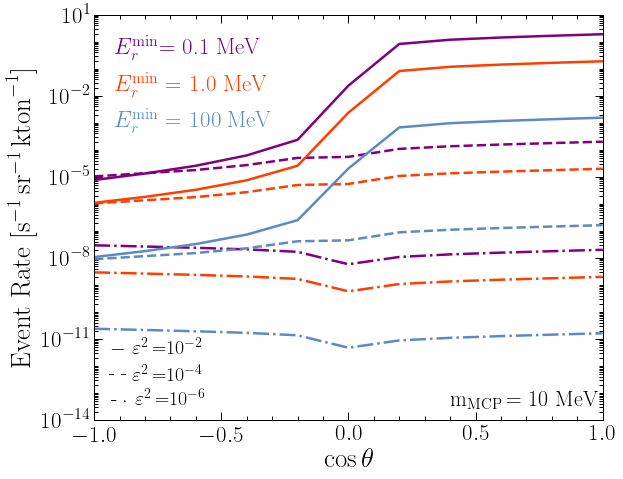

In [7]:
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(9,7))
#--------------------------------------------------------------------------------------------------------------------
color_list2=['purple','#FF3F00','#5C8BC3']

ax.plot(cos_values,rate_val01[2],'-', linewidth=lw,color=color_list2[0], label='$E_{r}^{\\rm{min}} $= 0.1 MeV')
ax.plot(cos_values,rate_val01[1],'--', linewidth=lw,color=color_list2[0], )
ax.plot(cos_values,rate_val01[0],'-.', linewidth=lw,color=color_list2[0], )

ax.plot(cos_values,rate_val1[2],'-', linewidth=lw,color=color_list2[1],label='$E_{r}^{\\rm{min}} $ = 1.0 MeV')
ax.plot(cos_values,rate_val1[1],'--', linewidth=lw,color=color_list2[1])
ax.plot(cos_values,rate_val1[0],'-.', linewidth=lw,color=color_list2[1])

ax.plot(cos_values,rate_val100[2],'-', linewidth=lw,color=color_list2[2],label='$E_{r}^{\\rm{min}} $ = 100 MeV')
ax.plot(cos_values,rate_val100[1],'--', linewidth=lw,color=color_list2[2])
ax.plot(cos_values,rate_val100[0],'-.', linewidth=lw,color=color_list2[2])


ax.set_yscale('log')

ax.set_xlabel(r"$\cos\theta$", fontsize=27)
ax.set_ylabel('Event Rate '+r'$[\textrm{s}^{-1}\,\textrm{sr}^{-1}\,\textrm{kton}^{-1}]  $', fontsize=27)

ax.minorticks_on()
ax.tick_params(labelsize=23,which='both',direction='in',axis='both',right=True, top=True, left=True,bottom=True,width=1.)

Locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(-1, 10) * 1, numticks=10000)
ax.yaxis.set_minor_locator(Locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlim(-1.,1.)
ax.set_ylim([1e-14,1e1])

leg=ax.legend(loc='best', fontsize=23, handlelength=0, handletextpad=0,fancybox=True)
leg.get_frame().set_edgecolor('white')
for it, text in enumerate(leg.get_texts()):# color for legend
    text.set_color(color_list2[it])

ax.text(0.034, 0.18, r'$-\,\, \varepsilon^{2}\,$' +'=' +r'$10^{-2}\,$' ,color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=20)

ax.text(0.03, 0.125, '-'+' -', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=20, color='black') 

ax.text(0.075, 0.11, r'$\,\,\, \varepsilon^{2}\,$' +'=' +r'$10^{-4}\,$',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=20)

ax.text(0.034, 0.06,'-',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=21)

ax.text(0.057, 0.06,'.',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=22)

ax.text(0.08, 0.05,r'$ \varepsilon^{2}\,$' +'=' +r'$10^{-6}\,$',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=20)

ax.text(0.7, 0.05, r'$ \textrm{m}_{\textrm{MCP}}\,$' +'= 10 MeV',color='black', horizontalalignment='left',
         verticalalignment='center', transform=ax.transAxes,fontsize=22)

plt.tight_layout()
plt.savefig(path_to_style+r'\Event_Rate.pdf', format='pdf')
plt.show()

### III) JUNO event distribution

In [8]:
from Scripts.fc import *

fc called!


In [9]:
from Scripts.JUNO_distribution import *

JUNO_distribution.py called! 


C:\Users\vicmual\Desktop\Repository\Scripts\JUNO_distribution.py:61: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  background_binned[background] = np.array([integrate.quad(background_spline[background],
C:\Users\vicmual\Desktop\Repository\Scripts\JUNO_distribution.py:61: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  background_binned[background] = np.array([integrate.quad(background_spline[background],


In [10]:
total = np.zeros(len(bin_centers))

for background in background_components:
    background_label = background
    if background == 'NC':
        background_label = r'$\nu$NC'
    total+=background_binned[background]
    
total_error_bars = np.array([construct_poisson_interval(d, alpha = 0.68) for d in total])
bin_width = np.diff(bin_edges)/2.

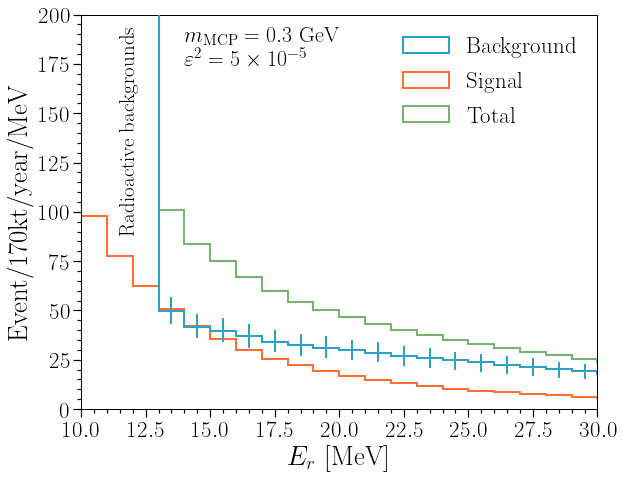

In [11]:
fig,ax=plt.subplots(figsize=(9,7))

lw=2.0

plt.errorbar(bin_centers,total,
             xerr = bin_width,
             yerr = [np.abs(total_error_bars[:,0]-total),
                     total_error_bars[:,1]-total],
             fmt = "+", color = '#29A2C6')

plt.hist(bin_centers, bins = bin_edges, weights = total,
         label = "Background", histtype="step", zorder = 10, linewidth=lw)
    
epsilon = 5.0e-05
mass = 0.3
ei, mi = GetIndexes(epsilon, mass)
pred = GetPrediction(ei, mi)
total+=GetBinnedPrediction(ei, mi, bin_edges)
mCPLabel = r"$m_{\rm MCP} = 0.3~{\rm GeV}$" + " \n  " + r"$\varepsilon^2 = 5 \times 10^{-5}$"
plt.text(14,175,mCPLabel, fontsize = 22)
plt.hist(bin_centers,
         bins = bin_edges,
         weights = GetBinnedPrediction(ei, mi, bin_edges),
         label = "Signal",
         histtype="step",linewidth=lw)

plt.hist(bin_centers,
         bins = bin_edges,
         weights = total,
         #color = "k",
         ls = "solid",
         label = "Total",
         histtype="step",linewidth=lw)

plt.xlim(10,30)
plt.ylim(0,200)
plt.yticks(fontsize=23)
plt.xticks(fontsize=23)

plt.text(11.5, 90, "Radioactive backgrounds", rotation = 90,fontsize=21)

plt.legend(loc = "upper right",fontsize=23)
plt.xlabel(r"$E_r~[{\rm MeV}]$",fontsize=27)
plt.ylabel("Event/170kt/year/MeV",fontsize=27)
plt.tight_layout()
plt.savefig(path_to_style+r'\JUNO_energy_distribution_epsilon_{}_mass_{}.pdf'.format(epsilon,mass), format='pdf')
plt.show()

###  IV) Single-Hit Constraints

In [12]:
import seaborn as sns
colpal = sns.color_palette("Paired", 10)
bluecolfill, bluecol, grncolfill, grncol, redcolfill, redcol, oracolfill, oracol, purcolfill, purcol = colpal[:10]

path_to_const=cwd+'\Data\Constraints'
path_to_const

'C:\\Users\\vicmual\\Desktop\\Repository\\Data\\Constraints'

In [13]:
#----- Load data
C0,mass_X1T,coupling_X1T = np.transpose(np.array(pd.read_csv(path_to_const+r'\Xenon_OneSidedFix.csv' )))
C0,mass_SK,coupling_SK = np.transpose(np.array(pd.read_csv(path_to_const+r'\mass_coupling_pts_SK_KKFix_OneSided.csv' )))
C0,mass_JUNO,coupling_JUNO = np.transpose(np.array(pd.read_csv(path_to_const+r'\mass_coupling_pts_JUNO_KKFix.csv' )))

coupling_SK = np.append(coupling_SK, 10.0)
mass_SK = np.append(mass_SK, mass_SK[-1])

coupling_JUNO = np.append(coupling_JUNO, 10.0)
mass_JUNO = np.append(mass_JUNO, mass_JUNO[-1])

#C0,mQ_m,mQ_c = np.transpose(np.array(pd.read_csv(path_to_const+r'\mQDemonstrator.csv',names=['C0','C1','C2'] ))) 
mQ=np.loadtxt(path_to_const+r"\mQDemonstrator.csv", delimiter=",")
ArgoNeuT = np.loadtxt(path_to_const+r"\ArgoNeuT_mCP.csv", delimiter=",")
SLAC = np.loadtxt(path_to_const+r"\SLACmQ_mCP.csv", delimiter=",")
AC = np.loadtxt(path_to_const+r"\AC_MCP.csv", delimiter=",")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


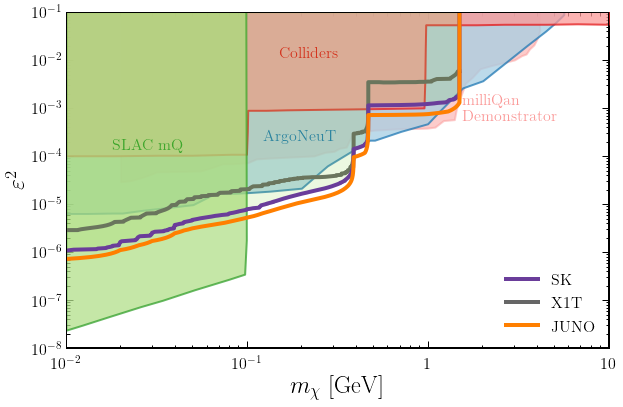

In [14]:
#----- Make plot
xmin, xmax, ymin, ymax = [0.01, 10, 1e-8, 1e-1]
fig,ax=plt.subplots(figsize=(9,6))
plt.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=50)

plt.fill_between(ArgoNeuT.T[0], 1.0, ArgoNeuT.T[1], edgecolor=bluecol, facecolor=bluecolfill, lw=2, alpha=0.75, interpolate=True, zorder=10)
plt.fill_between(SLAC.T[0], 1.0, SLAC.T[1], edgecolor=grncol, facecolor=grncolfill, lw=2, alpha=0.75, interpolate=True, zorder=14)
plt.fill_between(AC.T[0], 1.0, AC.T[1], edgecolor=redcol, facecolor=redcolfill, lw=2, alpha=0.75, interpolate=True, zorder=11)
plt.fill_between(mQ.T[0], 1.0, mQ.T[1], edgecolor=redcolfill, facecolor=redcolfill, lw=2, alpha=0.5, interpolate=True, zorder=8)

plt.plot(mass_SK,coupling_SK,linewidth=4., color=purcol,label='SK', zorder=28)
plt.fill_between(mass_SK,1e-1,coupling_SK,color='#82D02F', alpha=0.15, zorder=28)
plt.plot(mass_X1T,coupling_X1T,'-',linewidth=4, color='#666666',label='X1T', zorder=25)
plt.plot(mass_JUNO,coupling_JUNO,'-',linewidth=4.,color=oracol,label='JUNO', zorder=30)

plt.yscale('log')
plt.xscale('log')

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.legend(loc="lower right",fontsize=16, frameon=False)
plt.ylabel(r"$\varepsilon^2$",fontsize=24)
plt.xlabel(r"$m_\chi$"+' [GeV]',fontsize=24)

plt.minorticks_on()
plt.tick_params(which='both',direction='in',axis='both',right=True, top=True, width=1.) #width=2 make them sees as bold
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=3.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
[l.set_position((0.5, -0.015)) for l in plt.gca().get_xticklabels()]

plt.annotate(r"$\mathrm{SLAC\ mQ}$", xy=(1.8e-2, 1.0e-6), xytext=(0, 100), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=grncol)
plt.annotate(r"$\mathrm{Colliders}$", xy=(1.5e-1, 1.0e-2), xytext=(0, 0), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=redcol)
plt.annotate(r"$\mathrm{ArgoNeuT}$", xy=(2e-1, 4.0e-4), xytext=(-38, -16), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=bluecol)
plt.annotate(r"$\mathrm{milliQan}$", xy=(2.0, 3.0e-4), xytext=(-20, 40), textcoords="offset points", ha="left", va="top", size=16, zorder=20, color=redcolfill)
plt.annotate(r"$\mathrm{Demonstrator}$", xy=(2.0, 3.0e-4), xytext=(-20, 24), textcoords="offset points", ha="left", va="top", size=16, zorder=20, color=redcolfill)
plt.gca().set_xticklabels((r"", r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$"), size=16)

plt.tight_layout()
plt.savefig(path_to_style+r"\mcp_singlehit_constraints.pdf")
plt.show();

### V) Multiple-Hit Constraints

In [15]:
JD0 = np.loadtxt(path_to_const+r"\JUNO_DoubleHit_10keVFix.dat")
JDX = np.unique(np.transpose(JD0)[0])
JDY = np.unique(np.transpose(JD0)[1])
JDZ = (np.transpose(JD0)[2]).reshape((len(JDX),len(JDY)))

JD1 = np.loadtxt(path_to_const+r"\JUNO_DoubleHit_100keVFix.dat")
JDX1 = np.unique(np.transpose(JD1)[0])
JDY1 = np.unique(np.transpose(JD1)[1])
JDZ1 = (np.transpose(JD1)[2]).reshape((len(JDX1),len(JDY1)))

JD2 = np.loadtxt(path_to_const+r"\JUNO_DoubleHit_1MeVFix.dat")
JDX2 = np.unique(np.transpose(JD2)[0])
JDY2 = np.unique(np.transpose(JD2)[1])
JDZ2 = (np.transpose(JD2)[2]).reshape((len(JDX2),len(JDY2)))

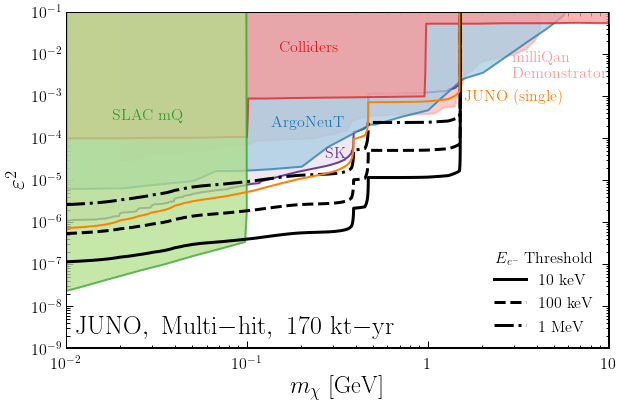

In [16]:
#----- Make plot
xmin, xmax, ymin, ymax = [0.01, 10, 1e-9, 1e-1]
fig,ax=plt.subplots(figsize=(9,6))

plt.fill_between(ArgoNeuT.T[0], 1.0, ArgoNeuT.T[1], edgecolor=bluecol, facecolor=bluecolfill, lw=2, alpha=0.75, interpolate=True, zorder=10)
plt.fill_between(SLAC.T[0], 1.0, SLAC.T[1], edgecolor=grncol, facecolor=grncolfill, lw=2, alpha=0.75, interpolate=True, zorder=12)
plt.fill_between(AC.T[0], 1.0, AC.T[1], edgecolor=redcol, facecolor=redcolfill, lw=2, alpha=0.75, interpolate=True, zorder=11)
plt.fill_between(mQ.T[0], 1.0, mQ.T[1], edgecolor=redcolfill, facecolor=redcolfill, lw=2, alpha=0.5, interpolate=True, zorder=8)

plt.plot(mass_SK,coupling_SK,linewidth=2, color=purcol, zorder=8)
plt.fill_between(mass_SK,1.0, coupling_SK,edgecolor='k', facecolor=purcolfill, lw=0, alpha=0.3, interpolate=True, zorder=8)

plt.plot(mass_JUNO,coupling_JUNO,'-',linewidth=2,color=oracol, zorder=30)
plt.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=50)

plt.yscale('log')
plt.xscale('log')

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.ylabel(r"$\varepsilon^2$",fontsize=24)
plt.xlabel(r"$m_\chi$"+' [GeV]',fontsize=24)

plt.contour(JDX, JDY, np.transpose(JDZ), levels=[10.0], linewidths=3, colors=['k'], linestyles='-', zorder=20)
plt.contour(JDX1, JDY1, np.transpose(JDZ1), levels=[10.0], linewidths=3, colors=['k'], linestyles='--', zorder=20)
plt.contour(JDX2, JDY2, np.transpose(JDZ2), levels=[10.0], linewidths=3, colors=['k'], linestyles='-.', zorder=20)

plt.plot([0.1*xmin, 10.0*xmin], [0.1*ymin, 0.1*ymin], lw=3, color='k', linestyle='-', label=r"$10\ \mathrm{keV}$")
plt.plot([0.1*xmin, 10.0*xmin], [0.1*ymin, 0.1*ymin], lw=3, color='k', linestyle='--', label=r"$100\ \mathrm{keV}$")
plt.plot([0.1*xmin, 10.0*xmin], [0.1*ymin, 0.1*ymin], lw=3, color='k', linestyle='-.', label=r"$1\ \mathrm{MeV}$")

legend = plt.legend(loc="lower right",fontsize=16, frameon=False, title=r"$E_{e^-}\ \mathrm{Threshold}$")
legend.get_title().set_fontsize(16)

plt.minorticks_on()
plt.tick_params(which='both',direction='in',axis='both',right=True, top=True, width=1.) #width=2 make them sees as bold
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=3.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
[l.set_position((0.5, -0.015)) for l in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels((r"", r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$"), size=16)

plt.annotate(r"$\mathrm{SLAC\ mQ}$", xy=(1.8e-2, 1.0e-6), xytext=(0, 100), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=grncol)
plt.annotate(r"$\mathrm{Colliders}$", xy=(1.5e-1, 1.0e-2), xytext=(0, 0), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=redcol)
plt.annotate(r"$\mathrm{ArgoNeuT}$", xy=(2e-1, 4.0e-4), xytext=(-30, -16), textcoords="offset points", ha="left", va="bottom", size=16, zorder=20, color=bluecol)
plt.annotate(r"$\mathrm{milliQan}$", xy=(2.0, 3.0e-4), xytext=(30, 68), textcoords="offset points", ha="left", va="top", size=16, zorder=20, color=redcolfill)
plt.annotate(r"$\mathrm{Demonstrator}$", xy=(2.0, 3.0e-4), xytext=(30, 52), textcoords="offset points", ha="left", va="top", size=16, zorder=20, color=redcolfill)
#plt.annotate(r"$\mathrm{Threshold}$", xy=(4.0, 1.0e-6), xytext=(0,-40), textcoords="offset points", ha="center", va="bottom", size=16, color='k')
plt.annotate(r"$\mathrm{SK}$", xy=(0.3, 1.0e-5), xytext=(2, 27), textcoords="offset points", ha="center", va="center", size=16, color=purcol, zorder=30)
plt.annotate(r"$\mathrm{JUNO\ (single)}$", xy=(1.5, 1.0e-3), xytext=(5, 0), textcoords="offset points", ha="left", va="center", size=16, color=oracol, zorder=30)
plt.annotate(r"$\mathrm{JUNO,\ Multi{-}hit,\ 170\ kt{-}yr}$", xy=(xmin, ymin), xytext=(10, 10), textcoords="offset points", ha="left", va="bottom", size=26, color='k')
plt.tight_layout()
plt.savefig(path_to_style+r"\mcp_constraints_Double.pdf")
plt.show();

### VI) XENON1T Preferred Region

In [17]:
X1SX, X1SY1, X1SY2 = np.transpose(np.loadtxt(path_to_const+r"\X1T_Pref_1S_New.dat"))
X2SX, X2SY1, X2SY2 = np.transpose(np.loadtxt(path_to_const+r"\X1T_Pref_2S_New.dat"))
mass, epsilon=np.transpose(np.loadtxt(path_to_const+r"\MCP_AllCurrent.csv", delimiter=","))
YEL = '#FFDF00'
GRN = '#009C3B'

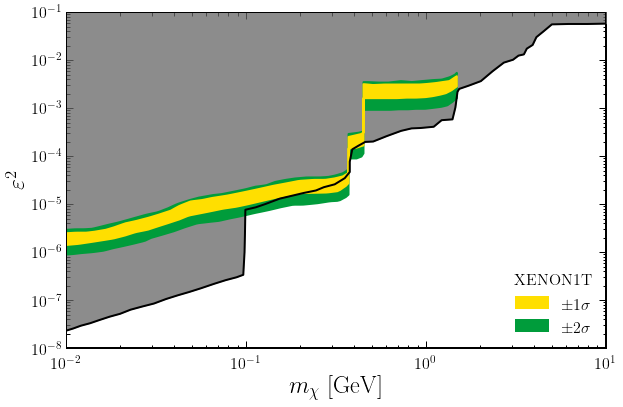

In [18]:
#----- Make plot
xmin, xmax, ymin, ymax = [0.01, 10, 1e-8, 1e-1]
fig,ax=plt.subplots(figsize=(9,6))
plt.fill_between(mass, 1.0, epsilon, edgecolor='k', lw=0, facecolor='#666666', alpha=0.75, interpolate=True, zorder=4)
plt.plot(mass, epsilon, lw=2, color='k', zorder=10)

plt.fill_between(X1SX, X1SY2, X1SY1, edgecolor=YEL, facecolor=YEL, lw=2, interpolate=True, zorder=6, label=r"$\pm 1\sigma$")
plt.fill_between(X2SX, X2SY2, X2SY1, edgecolor=GRN, facecolor=GRN, lw=2, interpolate=True, zorder=5, label=r"$\pm 2\sigma$")
plt.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=50)

plt.yscale('log')
plt.xscale('log')

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

legend = plt.legend(loc="lower right",fontsize=16, frameon=False, title=r"$\mathrm{XENON1T}$")
legend.get_title().set_fontsize(16)
plt.ylabel(r"$\varepsilon^2$",fontsize=24)
plt.xlabel(r"$m_\chi$"+' [GeV]',fontsize=24)

plt.minorticks_on()
plt.tick_params(which='both',direction='in',axis='both',right=True, top=True, width=1.) #width=2 make them sees as bold
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=3.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
[l.set_position((0.5, -0.015)) for l in plt.gca().get_xticklabels()]

plt.tight_layout()
plt.savefig(path_to_style+r"\mcp_XenonPref.pdf")
plt.show();